In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# 1. Cargar y explorar la data
df = pd.read_csv('caso2_microcredito_default.csv')



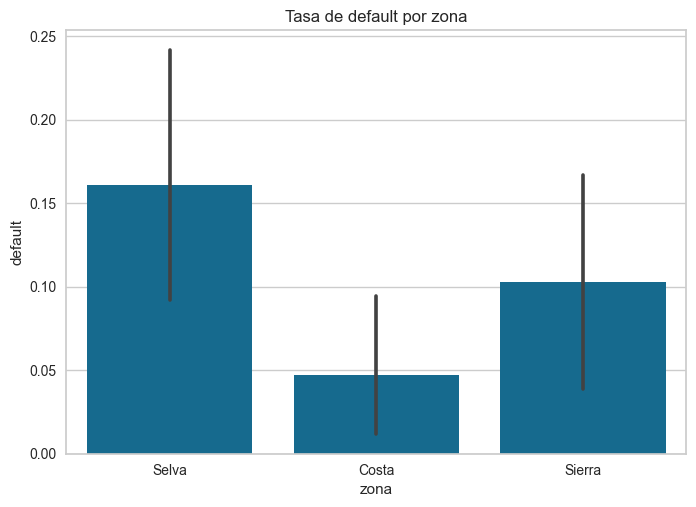

In [4]:
# 2. Análisis exploratorio NO trivial: identificar patrones por zona
sns.barplot(x='zona', y='default', data=df)
plt.title("Tasa de default por zona")
plt.show()



In [5]:
# 3. Segmentar por negocios donde el default es mayor
df_seg = df[df['tipo_negocio'].isin(['Agrícola', 'Comercio'])]



In [6]:
# 4. Configurar PyCaret con enfoque segmentado
exp = setup(data=df_seg,
            target='default',
            session_id=999,
            categorical_features=['zona', 'tipo_negocio'],
            ignore_features=['cuotas_pagadas'],
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
            normalize=True,
            fix_imbalance=True)



,Description,Value
0,Session id,999
1,Target,default
2,Target type,Binary
3,Original data shape,"(144, 7)"
4,Transformed data shape,"(226, 8)"
5,Transformed train set shape,"(182, 8)"
6,Transformed test set shape,"(44, 8)"
7,Ignore features,1
8,Numeric features,3
9,Categorical features,2


In [7]:
# 5. Buscar el mejor modelo considerando AUC y Recall
best = compare_models(sort='Recall')



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7000,0.5667,0.5000,0.1617,0.2400,0.1394,0.1708,0.0340
lr,Logistic Regression,0.7000,0.5444,0.4000,0.1200,0.1800,0.0856,0.1098,0.9540
svm,SVM - Linear Kernel,0.6700,0.5889,0.4000,0.1083,0.1700,0.0571,0.0795,0.0320
ridge,Ridge Classifier,0.7100,0.5556,0.4000,0.1283,0.1900,0.0983,0.1199,0.0320
lda,Linear Discriminant Analysis,0.7100,0.5556,0.4000,0.1283,0.1900,0.0983,0.1199,0.0310
knn,K Neighbors Classifier,0.7300,0.4722,0.3000,0.1200,0.1667,0.0625,0.0728,0.0460
dt,Decision Tree Classifier,0.8100,0.4944,0.2000,0.1500,0.1667,0.0889,0.0889,0.0320
lightgbm,Light Gradient Boosting Machine,0.8300,0.5444,0.2000,0.1500,0.1667,nan,0.0893,0.0780
rf,Random Forest Classifier,0.8400,0.5111,0.1000,0.0500,0.0667,nan,0.0000,0.1120
qda,Quadratic Discriminant Analysis,0.7800,0.4333,0.1000,0.0333,0.0500,-0.0387,-0.0435,0.0300


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7000,0.7778,1.0000,0.2500,0.4000,0.2857,0.4082
2,0.8000,1.0000,1.0000,0.3333,0.5000,0.4118,0.5092
3,0.9000,0.8889,1.0000,0.5000,0.6667,0.6154,0.6667
4,0.6000,0.6667,1.0000,0.2000,0.3333,0.2000,0.3333
5,0.9000,0.5556,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8000,0.8889,1.0000,0.3333,0.5000,0.4118,0.5092
7,0.6000,0.1111,0.0000,0.0000,0.0000,-0.1765,-0.2182
8,0.4000,0.2222,0.0000,0.0000,0.0000,-0.2000,-0.3333


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


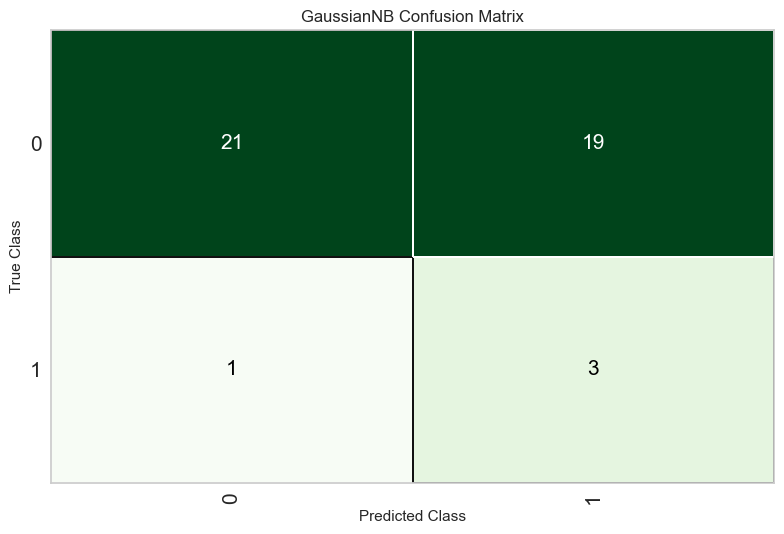

In [8]:
# 6. Evaluación de sensibilidad para reducir falsos negativos
final_model = tune_model(best, optimize='Recall')
plot_model(final_model, plot='confusion_matrix')




In [14]:
# 7. Interpretación por zona
interpret_model(final_model, plot='summary')



ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [15]:
# 8. Simular nuevo crédito (no usar todo el df)
nuevo_cliente = pd.DataFrame({
    'zona': ['Selva'],
    'tipo_negocio': ['Agrícola'],
    'monto_credito': [4500],
    'mujer_emprendedora': [1],
    'hijos': [3]
})
pred = predict_model(final_model, data=nuevo_cliente)
print(pred)



    zona tipo_negocio  monto_credito  mujer_emprendedora  hijos  \
0  Selva     Agrícola           4500                   1      3   

   prediction_label  prediction_score  
0                 1            0.9243  


In [16]:
# 9. Guardar para pipeline rural
save_model(final_model, 'modelo_default_rural_selva')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['monto_credito',
                                              'mujer_emprendedora', 'hijos'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     includ...
                  TransformerWrapper(exclude=None, include=None,
                               